In [1]:
import random 
import numpy as np
import matplotlib.pyplot as plt
import skimage as sk

from keras.datasets import cifar10
from keras.utils import np_utils
from sklearn.model_selection import train_test_split

Using TensorFlow backend.


In [0]:
def load_data(val_size, remove_classes=[], fraction=0.5, random_state=42):
    '''Returns train, validation and rest splits with respective one-hot encoded 
    target classifications and unique class names in cifar10


    Parameters:

    val_size(float): validation size with respect to total train+val size

    remove_classes(list): list of classes whose samples to remove from train+val

    fraction (float): fraction of samples of classes in remove_classes to remove
    from train+val

    random_state: random seed for train/val split


    Returns:

    x_train(numpy array): training set 

    x_val(numpy array): validation set

    x_test(numpy array): test set

    y_train_ohe(numpy array): one-hot encoded numpy array with classification 
    values for the training set

    y_val_ohe(numpy array): one-hot encoded numpy array with classification 
    values for the validation set

    y_test_ohe(numpy array):  one-hot encoded numpy array with classification 
    values for the validation set

    class_names(list): list with unique class names in cifar10

    '''
    (x_train_val, y_train_val), (x_test, y_test) = cifar10.load_data()
    class_names= load_class_names()

    x_train_val = x_train_val.astype('float32')
    x_test = x_test.astype('float32')

    samples_to_delete= [] 
    for c in remove_classes:
        samples= list(np.argwhere(y_train_val==class_names.index(c))[:,0])   
        samples_to_delete += random.sample(samples, k=int(fraction*len(samples)))
    
    x_train_val= np.delete(x_train_val,samples_to_delete,0)
    y_train_val= np.delete(y_train_val,samples_to_delete,0)
    
    x_train, x_val, y_train, y_val = train_test_split(x_train_val,
                                                      y_train_val,
                                                      test_size=val_size,
                                                      random_state=random_state)
    
    y_train_ohe = np_utils.to_categorical(y_train,len(class_names))
    y_test_ohe= np_utils.to_categorical(y_test,len(class_names))
    y_val_ohe = np_utils.to_categorical(y_val,len(class_names))

    return x_train, x_val , x_test, y_train_ohe, y_val_ohe, y_test_ohe, class_names
    

In [0]:
def load_class_names():
    '''Returns names of unique classes in cifar10'''
    return ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

In [0]:
def normalize(x,max_value=None):
    '''Returns normalized numpy array x by dividing it by max_value or 255

    
    Parameters:

    x(numpy array): numpy array to normalize

    max_value(int): value to use in the normalization (if 'None', 255 is used)


    Returns:

    x/max_value or x/255(numpy array): normalized numpy array 
    
    '''
    if max_value:
        print('Normalized by the maximum value of training set')
        return x/max_value
    else:
        return x/255

In [0]:
def normalize_splits(x_train, x_val, x_test):
    '''Returns normalized training, validation and test splits by maximum value
    x_train

    
    Parameters:

    x_train (numpy array): numpy array to normalize

    max_value(int): value to use in the normalization (if 'None', 255 is used)


    Returns:

    x/max_value or x/255(numpy array): normalized numpy array. 
    
    '''
    max_value= np.max(x_train)
    x_train= normalize(x_train, max_value)
    x_val= normalize(x_val, max_value)
    x_test= normalize(x_test, max_value)
    return x_train, x_val, x_test

In [0]:
def class_count(y,class_names):
    '''Counts the number of samples of each class in numpy array y


    Parameters:

    y(numpy array): one-hot encoded numpy array with classification 
    values

    class_names(list): list with unique class names in cifar10

    '''
    print('Number of samples:',y.shape[0])
    for i,c in enumerate(class_names):
            print(c,':',np.count_nonzero(y,axis=0)[i])

In [0]:
def class_count_splits(y_train,y_val,y_test,class_names):
    '''Counts the number of samples of each class in the training, validation 
    and test sets.
    

    Parameters:

    y_train(numpy array): one-hot encoded numpy array with classification 
    values for the training set

    y_val(numpy array): one-hot encoded numpy array with classification 
    values for the validation set

    y_test(numpy array):  one-hot encoded numpy array with classification 
    values for the validation set

    class_names(list): list with unique class names in cifar10

    '''
    print('**Training data**')
    class_count(y_train,class_names)
    print('')
    print('**Validation data**')
    class_count(y_val,class_names)
    print('')
    print('**Test data**')
    class_count(y_test,class_names)

In [0]:
def load_and_norm(val_size=0.22, random_state=42):
    '''Returns normalized training, validation, and test splits with 50% of
    samples of classes bird, deer, and truck removed from train+validation


    Parameters:

    val_size(float): validation size with respect to total train+val size

    random_state: random seed for train/val split


    Returns:

    x_train_norm(numpy array): normalized training set 

    x_val_norm(numpy array): normalized validation set

    x_test_norm(numpy array): normalized test set

    y_train(numpy array): one-hot encoded numpy array with classification 
    values for the training set

    y_val(numpy array): one-hot encoded numpy array with classification 
    values for the validation set

    y_test(numpy array):  one-hot encoded numpy array with classification 
    values for the validation set

    class_names(list): list with unique class names in cifar10

    '''
    (x_train, x_val,x_test, 
     y_train, y_val, y_test, 
    class_names) = load_data(remove_classes=['bird','deer','truck'],
                             val_size=val_size, random_state=random_state)
    
    x_train_norm, x_val_norm, x_test_norm= normalize_splits(x_train, 
                                                            x_val, 
                                                            x_test)
    class_count_splits(y_train,
                       y_val,
                       y_test,
                       class_names)

    return x_train_norm, x_val_norm, x_test_norm, y_train, y_val, y_test, class_names

In [0]:
def show_image_list(x, y, class_names, image_list):
    '''Plots a list of up to 20 images with class names


    Parameters:

    x(np array): numpy array representing a set of images

    y(np array): one-encoding classification of images in x

    class_names(list): list of unique classes in y with a matching order

    image_list(list): list of image indexes in x to plot

    '''
    if  len(image_list) > 20:
        raise ValueError('The number of images cannot be higher than 20.')
    fig =plt.figure(figsize=(18,6))
    for i,index in enumerate(image_list):
        ax=fig.add_subplot(2,10,1+i,xticks=[],yticks=[])
        ax.set_title(class_names[sum(np.argwhere(y[index]==1)[0])])
        plt.imshow(x[index])
    plt.show()

In [0]:
def random_images(y,class_names):
    '''Returns indexes of randomly selected images, each one belonging to each 
    class in cifar10
    

    Parameters:

    y(numpy array): one-hot encoded numpy array with image classification values

    class_names(list)

    '''
    y= y.argmax(axis=1)
    selected=[]
    for i,c in enumerate(class_names):
        sample= list(random.choice(np.argwhere(y==i)))
        selected+= sample
    return selected

In [0]:
def show_image(x, y, class_names):
    '''Plots a single image x with respective class name
    

    Parameters:

    x(numpy array): numpy array representing an image

    y(numpy array): numpy array representing one-hot encoded classification of x
    
    '''
    fig =plt.figure()
    plt.title(class_names[sum(np.argwhere(y==1)[0])])
    plt.imshow(x)
    plt.show()

In [0]:
def gaussian_noise(x,seed=42):
    return sk.util.random_noise(x, mode='gaussian',seed=seed)

In [13]:
x_train, x_val, x_test, y_train, y_val, y_test, class_names = load_and_norm()

170500096/170498071 [==============================] - 2s 0us/step
Normalized by the maximum value of training set
Normalized by the maximum value of training set
Normalized by the maximum value of training set
**Training data**
Number of samples: 33150
airplane : 3847
automobile : 3918
bird : 1969
cat : 3891
deer : 1937
dog : 3900
frog : 3881
horse : 3913
ship : 3934
truck : 1960

**Validation data**
Number of samples: 9350
airplane : 1153
automobile : 1082
bird : 531
cat : 1109
deer : 563
dog : 1100
frog : 1119
horse : 1087
ship : 1066
truck : 540

**Test data**
Number of samples: 10000
airplane : 1000
automobile : 1000
bird : 1000
cat : 1000
deer : 1000
dog : 1000
frog : 1000
horse : 1000
ship : 1000
truck : 1000


In [0]:
image_list=random_images(y_val,class_names)

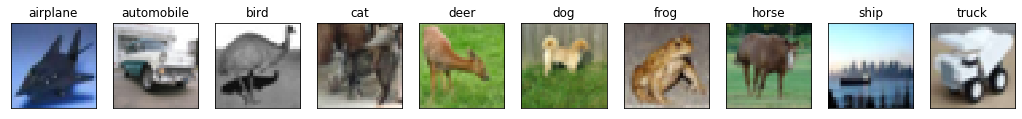

In [16]:
show_image_list(x_val,y_val,class_names,image_list)